In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [118]:
print(train.shape,test.shape)

(891, 12) (418, 11)


In [119]:
totaldata = pd.concat([train,test],axis =0,ignore_index=True, sort  = False)
print(totaldata.shape)

(1309, 12)


Data exploration

In [120]:
totaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


We see that Age , Cabin, Embarked, Fare have missing values

correalation

<AxesSubplot:>

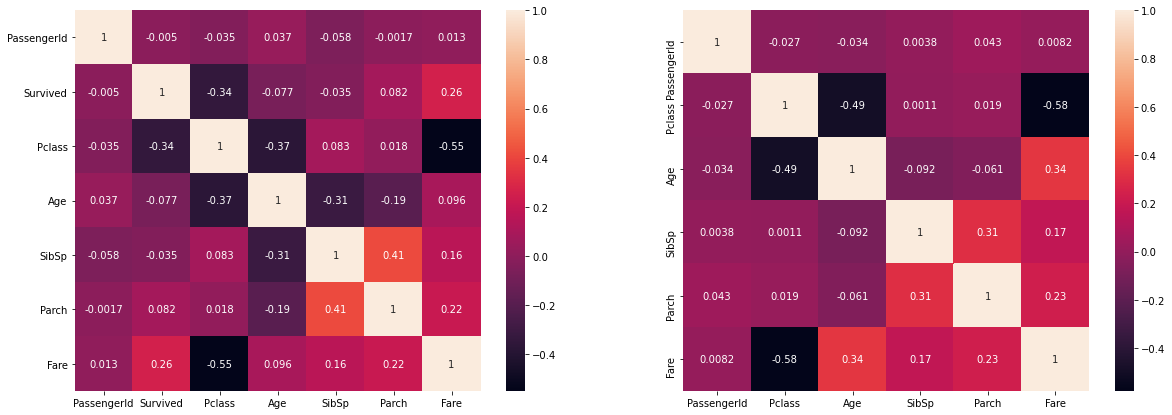

In [5]:

fig = plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.heatmap(totaldata.corr(),annot = True)
plt.subplot(1,2,2)
sns.heatmap(test.corr(),annot = True)

We see that  following are highly correalted   
parch and sibsp    
Pclass and Fare    
Pclass and survived    
Fare and survived    
Pclass and age   
Sibsp and age    
Maybe we can make a new feature out of parch and sib   
we can drop cabin,passenger id and fill missing values for age and embarked   



EDA   

We see each of the features separately and their relation to the the survival
## Survived

We see that 60% of the passengers did not survive

Text(0, 0.5, 'Survival Rate')

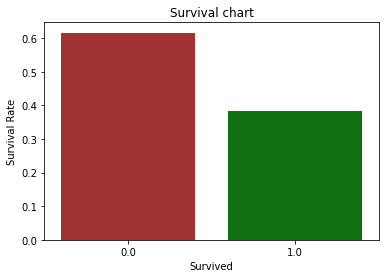

In [134]:
ax = sns.barplot(x = totaldata.Survived,
            y=totaldata.Survived.value_counts(normalize=True),
            palette = ['firebrick','green'])

ax.set_title("Survival chart")
ax.set_ylabel("Survival Rate")

## Pclass- Passenger class   
We see that almost 60% passengers were travelling with third class tickets while only 20% of the third class passangers survived

Text(0, 0.5, 'Ratio')

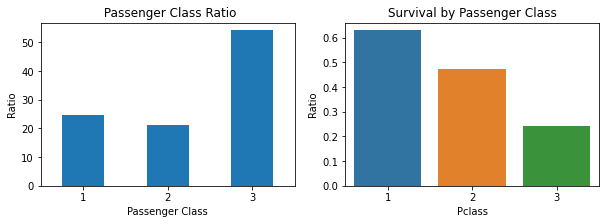

In [130]:
#sns.countplot(x = train.Sex,palette = ['firebrick','green']).set_ylabel("Survival Rate")
fig = plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
ax = (pd.Series(totaldata.Pclass).value_counts(normalize=True, sort= False)*100).plot.bar()
ax.set_title(" Passenger Class Ratio")
ax.set_ylabel('Ratio')
ax.set_xlabel('Passenger Class')
plt.xticks(rotation = 0)
plt.subplot(1,2,2)
ax1 = sns.barplot(x = train.Pclass,
                 y = totaldata.Survived,
                  ci =None)
ax1.set_title('Survival by Passenger Class')
ax1.set_ylabel('Ratio')

## Name 

By extracting the titles from the names , we see that there are 18 titles and this can be used to impute missing values of Age. We can use the median ages of the titles to impute the missing values.



In [159]:
totaldata.Name

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [164]:
titles = totaldata.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip()).unique()
print(titles,len(titles))

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona'] 18


## Gender
We see that although there were more than 60% male passengers, less than 20% of the male passangers survived.

Text(0, 0.5, 'Ratio')

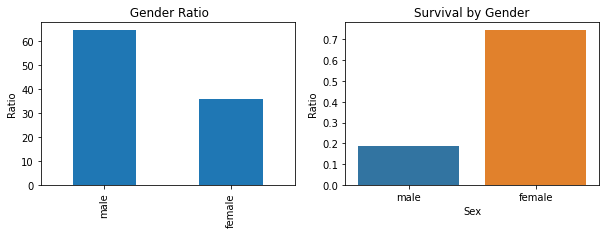

In [169]:
#sns.countplot(x = train.Sex,palette = ['firebrick','green']).set_ylabel("Survival Rate")
fig = plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
ax = (pd.Series(totaldata.Sex).value_counts(normalize=True, sort= True)*100).plot.bar()
ax.set_title(" Gender Ratio")
ax.set_ylabel('Ratio')

plt.subplot(1,2,2)
ax1 = sns.barplot(x = totaldata.Sex,
                 y = totaldata.Survived,
                  ci =None)
ax1.set_title('Survival by Gender')
ax1.set_ylabel('Ratio')

## Age
Since the feature Age has missing values, we need to expolore it with relation to other features so that we can fill the missing values.


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '(0, 10]'),
  Text(1, 0, '(10, 20]'),
  Text(2, 0, '(20, 30]'),
  Text(3, 0, '(30, 40]'),
  Text(4, 0, '(40, 50]'),
  Text(5, 0, '(50, 60]'),
  Text(6, 0, '(60, 70]'),
  Text(7, 0, '(70, 80]')])

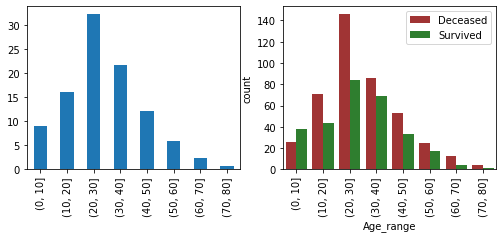

In [173]:
totaldata['Age_range'] = pd.cut(train.Age,[0,10,20,30,40,50,60,70,80])

fig = plt.figure(figsize = (13,3))
plt.subplot(1,3,1)
#ax1 = totaldata.Age.plot(kind = 'kde')
#ax1.set_xlabel('Ages')
#ax1 = sns.countplot(x = "Age_range", data = totaldata)
ax1 = (pd.Series(totaldata.Age_range).value_counts(normalize=True, sort= False)*100).plot.bar()

plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.countplot(x = "Age_range", 
              hue = "Survived", 
              data = totaldata,
              palette = ["firebrick","forestgreen"]).legend(labels = ["Deceased", "Survived"])
plt.xticks(rotation = 90)



## SibSp- Sibling Spouse
We see that almost 70% passengers were travelling alone.   

We see that survival rate of the passengers that travelled with 1,2 or 3 family members is the highest as compared to those travelling alone ot to those who were travelling with families greater that 3 members.



(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '8')])

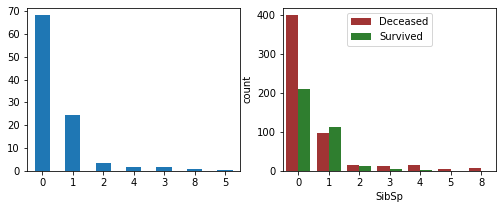

In [171]:
fig = plt.figure(figsize = (13,3))
plt.subplot(1,3,1)
ax1 = (pd.Series(totaldata.SibSp).value_counts(normalize=True, sort= True)*100).plot.bar()
#ax1 = sns.countplot(x = "SibSp", data = totaldata)
plt.xticks(rotation = 0)

plt.subplot(1,3,2)
sns.countplot(x = "SibSp", 
              hue = "Survived", 
              data = totaldata,
              palette = ["firebrick","forestgreen"]).legend(labels = ["Deceased", "Survived"])
plt.xticks(rotation = 0)

# Parch - Parent-Child

We see a similar pattern as in Sibling/Spouse feature.


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '9')])

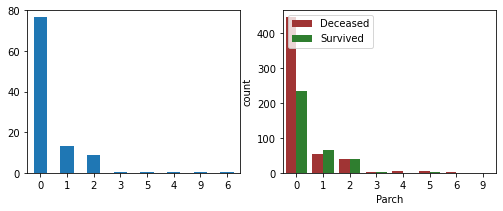

In [174]:
fig = plt.figure(figsize = (13,3))
plt.subplot(1,3,1)
ax1 = (pd.Series(totaldata.Parch).value_counts(normalize=True, sort= True)*100).plot.bar()


plt.xticks(rotation = 0)

plt.subplot(1,3,2)
sns.countplot(x = "Parch", 
              hue = "Survived", 
              data = totaldata,
              palette = ["firebrick","forestgreen"]).legend(labels = ["Deceased", "Survived"])
plt.xticks(rotation = 0)

## Ticket 

We see that ticket numbers are same for many values. And this feature does to add any value to the prediction of survival. We may drop this feature.




In [177]:
len(totaldata.Ticket.unique())

929

## Fare 

We see that the fare is not the same for different passengers. Also the range is from 0 - 512, but we see very less passangers having tickets with fare > 93 and only one has a fare of 512 after 263. This is clearly an outlier.



(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

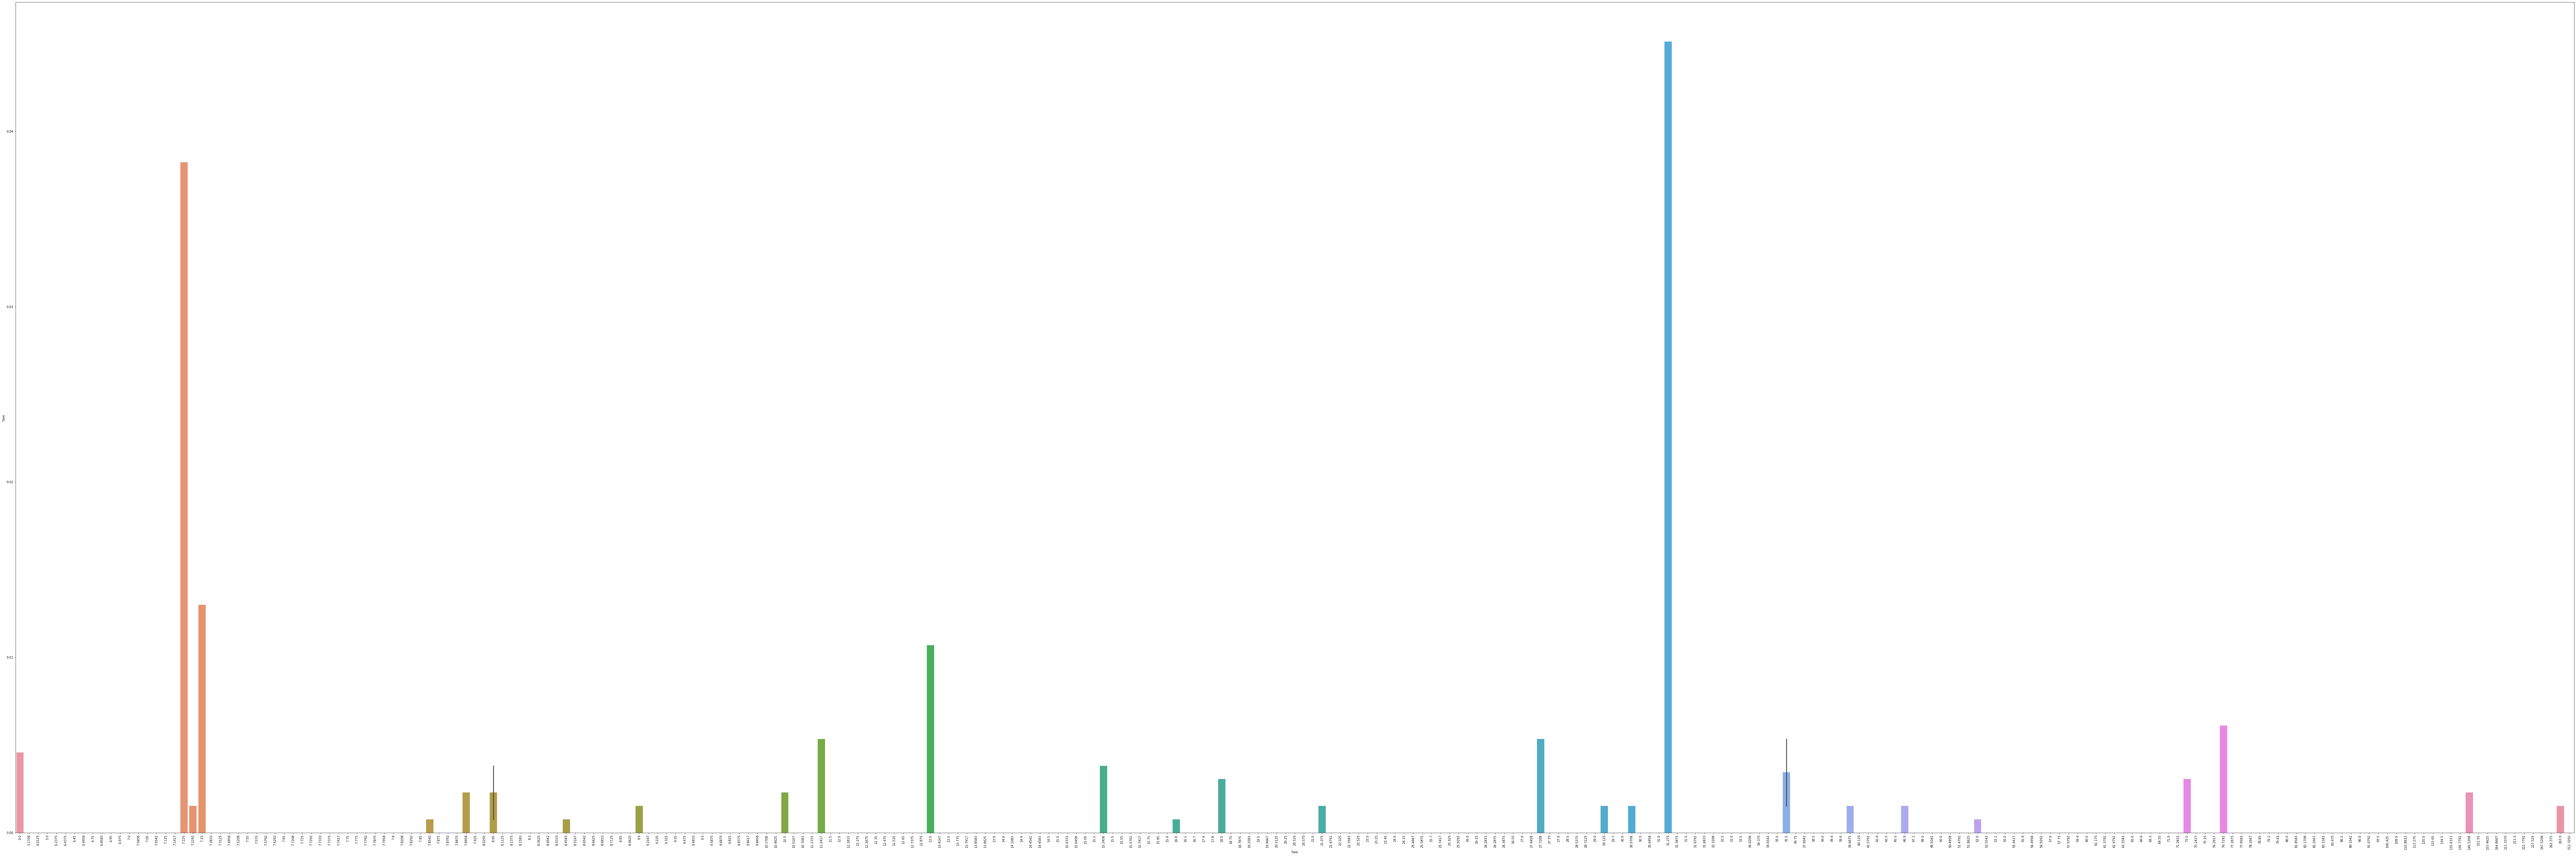

In [213]:
fig = plt.figure(figsize = (150,50))
sns.barplot(x = totaldata.Fare,
            y=totaldata.Fare.value_counts(normalize=True))
plt.xticks(rotation = 90)

## Cabin 

We have seen that Cabin has 1014 null values out of a total of 1039 values. We might drop the feature cabin




In [215]:
totaldata.Cabin.nunique()

186

In [218]:
totaldata.Cabin.isnull().sum()

1014

## Embarked

We observe that 70% passangers boarded the ship from station "S".
Survival rate of passangers boarded from station "C" is the highest.
We see that maximum passangers that boareded from station C were first class passangers that's why more survival can be seen from embarked = C

<AxesSubplot:xlabel='Embarked', ylabel='count'>

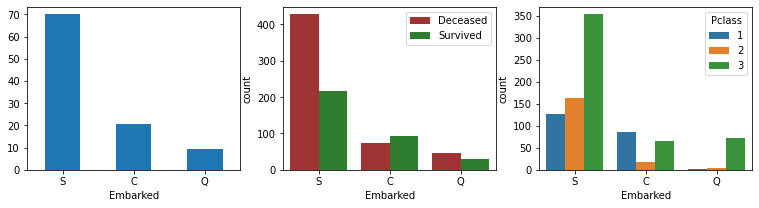

In [223]:
fig = plt.figure(figsize = (13,3))
plt.subplot(1,3,1)
ax1 = (pd.Series(totaldata.Embarked).value_counts(normalize=True, sort= True)*100).plot.bar()
ax1.set_xlabel("Embarked")
ax1.set_ylabel("Ratio")
plt.xticks(rotation = 0)

plt.subplot(1,3,2)
sns.countplot(x = "Embarked", 
              hue = "Survived", 
              data = totaldata,
              palette = ["firebrick","forestgreen"]).legend(labels = ["Deceased", "Survived"])
plt.xticks(rotation = 0)

plt.subplot(1,3,3)
sns.countplot(x = "Embarked",hue ="Pclass",data = train)

## Feature Engineering and imputing missing data

### columns to be dropped
1. Cabin
2. Ticket
3. PassengerId

In [225]:
totaldata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.0, 30.0]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.0, 40.0]"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20.0, 30.0]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.0, 40.0]"
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30.0, 40.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN
